In [2]:
%matplotlib inline
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import openmc

import openmc_msbr_model

In [3]:
model = openmc_msbr_model.main(0.01)

/home/yardasol/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)


In [10]:
mats = model.materials
geo = model.geometry
settings = model.settings

#bounds = [-261.112, -261.112, -7.62, 261.112, 261.112, 449.58]
#uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
#settings.source = openmc.Source(space=uniform_dist)

#model.settings = settings

tallies = openmc.Tallies()

# Create mesh which will be used for tally
mesh = openmc.RegularMesh()
mesh.dimension = [100, 100]
mesh.lower_left = [-261.112, -261.112]
mesh.upper_right = [261.112, 261.112]

# Create mesh filter for tally
mesh_filter = openmc.MeshFilter(mesh)

tally = openmc.Tally(name='flux')
tally.filters = [mesh_filter]
tally.scores = ['flux', 'fission']
tallies.append(tally)

model.tallies = tallies

model.export_to_xml()

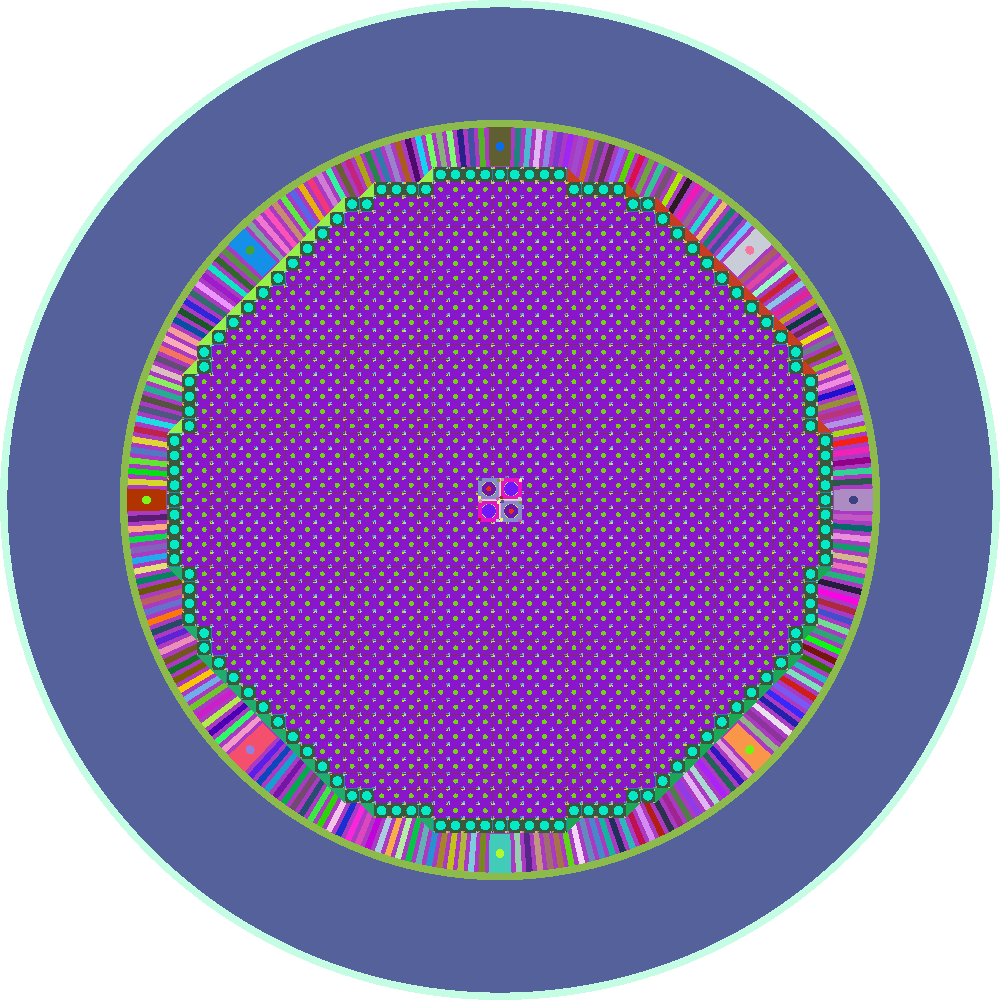

In [11]:
plot = openmc.Plot.from_geometry(geo, slice_coord=200)
plot.pixels = (1000, 1000)
plot.to_ipython_image()

In [12]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

      123/1    1.07565    1.07271 +/- 0.00087
      124/1    1.06992    1.07265 +/- 0.00085
      125/1    1.07754    1.07276 +/- 0.00084
      126/1    1.07758    1.07286 +/- 0.00082
      127/1    1.06715    1.07274 +/- 0.00082
      128/1    1.07533    1.07280 +/- 0.00080
      129/1    1.07269    1.07279 +/- 0.00078
      130/1    1.07704    1.07288 +/- 0.00077
      131/1    1.06434    1.07271 +/- 0.00078
      132/1    1.07635    1.07278 +/- 0.00076
      133/1    1.07445    1.07281 +/- 0.00075
      134/1    1.07018    1.07276 +/- 0.00074
      135/1    1.06026    1.07254 +/- 0.00076
      136/1    1.07875    1.07265 +/- 0.00075
      137/1    1.06240    1.07247 +/- 0.00076
      138/1    1.07561    1.07252 +/- 0.00075
      139/1    1.07401    1.07255 +/- 0.00074
      140/1    1.07334    1.07256 +/- 0.00073
      141/1    1.07089    1.07253 +/- 0.00071
      142/1    1.07317    1.07254 +/- 0.00070
      143/1    1.07912    1.07265 +/- 0.00070
      144/1    1.06938    1.07260 

In [13]:
# Load the statepoint file
sp = openmc.StatePoint('statepoint.200.h5')


In [14]:
tally = sp.get_tally(scores=['flux'])
print(tally)

Tally
	ID             =	4
	Name           =	flux
	Filters        =	MeshFilter
	Nuclides       =	total
	Scores         =	['flux', 'fission']
	Estimator      =	tracklength
	Multiply dens. =	True


In [15]:
tally.sum

array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       ...,

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]])

In [16]:
print(tally.mean.shape)
(tally.mean, tally.std_dev)

(10000, 1, 2)


(array([[[0., 0.]],
 
        [[0., 0.]],
 
        [[0., 0.]],
 
        ...,
 
        [[0., 0.]],
 
        [[0., 0.]],
 
        [[0., 0.]]]),
 array([[[0., 0.]],
 
        [[0., 0.]],
 
        [[0., 0.]],
 
        ...,
 
        [[0., 0.]],
 
        [[0., 0.]],
 
        [[0., 0.]]]))

In [17]:
flux = tally.get_slice(scores=['flux'])
fission = tally.get_slice(scores=['fission'])
print(flux)

Tally
	ID             =	5
	Name           =	flux
	Filters        =	MeshFilter
	Nuclides       =	total
	Scores         =	['flux']
	Estimator      =	tracklength
	Multiply dens. =	True


In [21]:
flux.std_dev.shape = (100, 100)
flux.mean.shape = (100, 100)
fission.std_dev.shape = (100, 100)
fission.mean.shape = (100, 100)

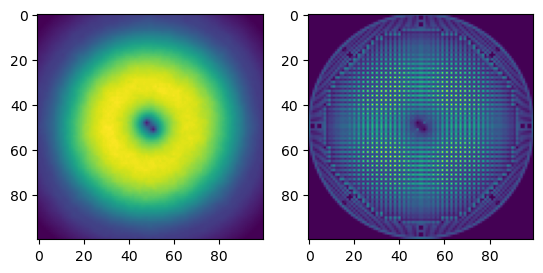

In [26]:
fig = plt.subplot(121)
fig.figsize = (8,6)
fig.imshow(flux.mean)
fig2 = plt.subplot(122)
fig2.imshow(fission.mean)